In [23]:
from argparse import Namespace
from prafa.universe import Universe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

import pickle

In [26]:
filepath = 'results/portfolio_sp500_lagrange_ours_30.json'
with open(filepath, 'rb') as f:
    portfolios = pickle.load(f)
print(portfolios)

{Timestamp('2014-01-02 00:00:00'): {'EIX': 0, 'AEE': 0, 'AA': 0, 'LYB': 0, 'AXP': 0, 'BA': 0, 'CAT': 0, 'JPM': 0, 'CVX': 0, 'KO': 0, 'DIS': 0, 'XOM': 0, 'GE': 0, 'HPQ': 0, 'HD': 0, 'IBM': np.float64(0.004712588939230468), 'JNJ': np.float64(0.04103631771093082), 'MCD': np.float64(0.10510240442940201), 'MRK': 0, 'MMM': 0, 'BAC': 0, 'PFE': 0, 'PG': 0, 'T': 0, 'TRV': 0, 'RTX': 0, 'ADI': 0, 'WMT': np.float64(0.07639655550195443), 'CSCO': 0, 'INTC': 0, 'MSFT': 0, 'DG': np.float64(0.015479033938448019), 'CI': 0, 'KMI': 0, 'C': 0, 'AIG': 0, 'HON': 0, 'MO': 0, 'IP': 0, 'ABT': 0, 'AFL': 0, 'APD': 0, 'ARG': 0, 'AEP': 0, 'HES': 0, 'APC': 0, 'ADM': 0, 'GAS': 0, 'ADP': 0, 'AZO': np.float64(0.03779813654530042), 'APA': 0, 'AVY': 0, 'AVP': 0, 'BHI': 0, 'BALL': 0, 'BK': 0, 'BCR': 0, 'BAX': 0, 'BDX': 0, 'BMS': 0, 'BBY': 0, 'HRB': 0, 'BSX': 0, 'BMY': 0, 'CTRA': 0, 'KSU': 0, 'CPB': 0, 'CCL': 0, 'LUMN': 0, 'CLF': 0, 'CLX': np.float64(0.024447899638870937), 'CMS': 0, 'CL': 0, 'CMA': 0, 'CSC': 0, 'CAG': 0, '

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
⚠️ Les actions suivantes ne sont pas dans les données de rendement : {'2258717D', '1500785D', '9991429D', '1858968D', '1684442D', '1541931D', '1831877D', 'FTRCQ', '1856613D', '9990213D', 'BRK.B', '2558202D', '1448062D', '9876549D', '1288453D', '1806854D', '1436513D', 'DOFSQ', 'BF.B', '1715651D', '1518855D', '2557974D', '9983490D', '2326248D', '1431816D', '1539941D', '2370058D', 'WINMQ', '1697067D', '9980328D', 'DNRCQ', '9876566D', 'BBBYQ', 'CHKAQ', 'BTUUQ', '1927294D', 'VALPQ', '1284849D', '1752754D', '1566019D', 'NEBLQ', '1922150D', '1255459D', '9876544D', '2544554D', '9903115D', '2078185D'}
Removed 2 columns due to too many missing values.
Removed 0 rows due to missing values.
Removed 0 columns due to too many missing values.
Removed 0 rows due to missing values.
⚠️ Les actions suivantes ne sont pas dans les données de rendement : {'2258717D', '1500785D', '9991429D', '1684442D'

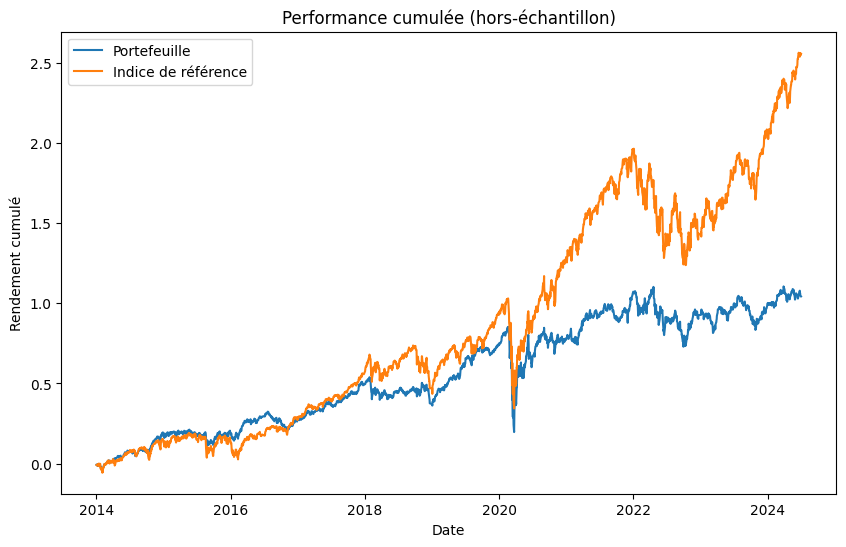

In [ ]:

args = Namespace()
args.index = 'sp500'
args.data_path = 'financial_data'
args.result_path = 'results'
args.solution_name = 'lagrange_ours'
args.rebalancing = 6  
args.start_date = '2014-01-02'
args.end_date = '2025-01-02'

# Initialiser l'objet Universe
universe = Universe(args)


# S'assurer que les dates sont ordonnées
dates = sorted(list(portfolios.keys()))
n = len(dates)

rendements_portefeuille = []
rendements_indice = []
index_dates = []

for i in range(n - 1):  # On va jusqu'à n-1 car on a besoin de t et t+1
    start_date = dates[i]
    end_date = dates[i + 1] - pd.tseries.offsets.BDay(1)  # veille du prochain rebalance

    # Extraire rendements entre deux rebalancements
    universe.new_universe(start_date, end_date, training=False)
    window_returns = universe.get_stocks_returns()
    weights_dict = portfolios[start_date]
    
    
    rendements_journaliers = []

    # Parcourir chaque date
    for date in window_returns.index:
        rendement_jour = 0
        for stock, weight in weights_dict.items():
            if stock in window_returns.columns:
                r = window_returns.at[date, stock]
            
                rendement_jour += weight * r
        rendements_journaliers.append(rendement_jour)

    ri = universe.get_index_returns().iloc[:, 0].tolist()

    rendements_portefeuille += rendements_journaliers
    rendements_indice += ri
    index_dates += list(window_returns.index)

# Construire les séries temporelles
rendements_portefeuille = pd.Series(rendements_portefeuille, index=index_dates)
rendements_indice = pd.Series(rendements_indice, index=index_dates)

# Cumuler les rendements
rendements_cumules_portefeuille = (rendements_portefeuille + 1).cumprod() -1
rendements_cumules_indice = (rendements_indice + 1).cumprod() - 1

# Tracer
plt.figure(figsize=(10, 6))  # Taille du graphique

# Tracer les deux courbes
plt.plot(rendements_cumules_portefeuille, label="Portefeuille")
plt.plot(rendements_cumules_indice, label="Indice de référence")

# Ajouter des titres et des labels
plt.title("Performance cumulée (hors-échantillon)")
plt.xlabel("Date")
plt.ylabel("Rendement cumulé")

# Afficher la légende et la grille
plt.legend()

# Afficher le graphique
plt.show()


xd 
 
 
 xd
